In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
phi_s = np.abs(np.random.normal(0.25,0.01,300))
swc_s = np.abs(np.random.normal(0.1,0.01,300))
k_s = 8.58102*(phi_s**(4.4))/(swc_s**2)

In [3]:
phi_l = np.abs(np.random.normal(0.20,0.01,300))
swc_l = np.abs(np.random.normal(0.1,0.01,300))
k_l = 8.58102*(phi_l**(4.4))/(swc_l**2)

In [4]:
#DataFrame Sandstone
dfS = pd.DataFrame({'Porosity':phi_s , 'Swc':swc_s, 'Permeability(D)':k_s})
dfS['label'] = 1
label_s = np.array(dfS['label'])
dfS['lithology'] = "Sandstone"
lithologyS = np.array(dfS['lithology'])
dfS

,Porosity,Swc,Permeability(D),label,lithology
0,0.252444,0.108456,1.708277,1,Sandstone
1,0.259471,0.096451,2.437342,1,Sandstone
2,0.233486,0.108631,1.207753,1,Sandstone
3,0.228984,0.092436,1.531081,1,Sandstone
4,0.237101,0.096484,1.638055,1,Sandstone
...,...,...,...,...,...
295,0.244204,0.097844,1.813761,1,Sandstone
296,0.245190,0.114704,1.343361,1,Sandstone
297,0.267093,0.103317,2.412735,1,Sandstone
298,0.240848,0.095838,1.778816,1,Sandstone


In [7]:
#DataFrame Limestone
dfL = pd.DataFrame({'Porosity':phi_l , 'Swc':swc_l, 'Permeability(D)':k_l})
dfL['label'] = 0
label_l = np.array(dfL['label'])
dfL['lithology'] = "Limestone"
lithologyL = np.array(dfL['lithology'])
dfL

,Porosity,Swc,Permeability(D),label,lithology
0,0.203788,0.103069,0.737347,0,Limestone
1,0.205941,0.116977,0.599519,0,Limestone
2,0.198535,0.106023,0.621190,0,Limestone
3,0.195534,0.116466,0.481410,0,Limestone
4,0.206969,0.096583,0.898905,0,Limestone
...,...,...,...,...,...
295,0.192627,0.110035,0.504926,0,Limestone
296,0.202454,0.105919,0.678310,0,Limestone
297,0.205594,0.103403,0.761581,0,Limestone
298,0.186624,0.105314,0.479537,0,Limestone


In [8]:
#Combining DataFrame of sandstone and limestone and shuffling
phi = np.append(phi_s,phi_l)
k = np.append(k_s,k_l)
swc = np.append(swc_s,swc_l)
label = np.append(label_s,label_l)
lithology = np.append(lithologyS,lithologyL)
df = pd.DataFrame({'Porosity':phi ,  'Permeability(D)':k,'Swc':swc, 'Label':label, "Lithology":lithology})
#Shuffling data
df = df.sample(frac = 1) 
df.head()

,Porosity,Permeability(D),Swc,Label,Lithology
135,0.261838,1.847371,0.113023,1,Sandstone
464,0.211287,1.061215,0.093022,0,Limestone
204,0.267418,2.547724,0.100812,1,Sandstone
513,0.189673,0.521953,0.104608,0,Limestone
258,0.251913,2.263732,0.093779,1,Sandstone


In [10]:
df = df.reset_index()

In [12]:
df = df.drop("index",axis =1)

In [13]:
df

,Porosity,Permeability(D),Swc,Label,Lithology
0,0.261838,1.847371,0.113023,1,Sandstone
1,0.211287,1.061215,0.093022,0,Limestone
2,0.267418,2.547724,0.100812,1,Sandstone
3,0.189673,0.521953,0.104608,0,Limestone
4,0.251913,2.263732,0.093779,1,Sandstone
...,...,...,...,...,...
595,0.205622,0.907546,0.094752,0,Limestone
596,0.205706,0.984683,0.091047,0,Limestone
597,0.257950,2.668588,0.090992,1,Sandstone
598,0.243762,1.333738,0.113648,1,Sandstone


In [14]:
# df.info()
df.describe()

,Porosity,Permeability(D),Swc,Label
count,600.000000,600.000000,600.000000,600.000000
mean,0.223964,1.349780,0.100097,0.500000
std,0.026607,0.735974,0.009654,0.500417
min,0.167694,0.286399,0.071284,0.000000
25%,0.199149,0.718512,0.093769,0.000000
50%,0.224122,1.133284,0.099898,0.500000
75%,0.248712,1.860554,0.106155,1.000000
max,0.273113,4.152439,0.131027,1.000000


In [15]:
df.head()

,Porosity,Permeability(D),Swc,Label,Lithology
0,0.261838,1.847371,0.113023,1,Sandstone
1,0.211287,1.061215,0.093022,0,Limestone
2,0.267418,2.547724,0.100812,1,Sandstone
3,0.189673,0.521953,0.104608,0,Limestone
4,0.251913,2.263732,0.093779,1,Sandstone


In [16]:
X = np.array([df['Porosity'] , df['Permeability(D)'],df["Swc"]])

In [17]:
y = np.array(df['Label']).reshape(1,600)

In [18]:
X

array([[0.26183845, 0.21128675, 0.26741833, ..., 0.25794966, 0.24376248,
        0.25547565],
       [1.8473712 , 1.06121525, 2.54772359, ..., 2.66858834, 1.33373805,
        1.71036536],
       [0.11302276, 0.09302221, 0.10081238, ..., 0.09099249, 0.11364787,
        0.11127406]])

In [19]:
X.shape

(3, 600)

In [20]:
y.shape

(1, 600)

In [21]:
def sigma(z):
    
    s = 1/(1 + np.exp(-z))
    
    return s

In [24]:
def initialize(X):
    #
    #To initialize the weights and bias.
    #Here two features so nx = 2
    #Hence Weight matrix must be (2,1)
    n = X.shape[0]
    w = np.zeros((n,1))
    b = 0
    
    return w , b

In [25]:
def fpropogate(X,w,b):
    
    # w - (2X1)
    # X = (2Xm)
    # Z = w'.X + b ==> (1x2).(2,m) + 0 ==> (1,m)
    
    Z = np.dot(w.T , X) + b
    
    A = sigma(Z)
    
    return A

In [26]:
def cost(X,y,w,b):
    
#     w,b = initialize(X)
    
    A = fpropogate(X,w,b)
    
    L = y*np.log(A) + (1-y)*np.log(1-A)
    
    m = X.shape[1]
    
    J = (-1/m)*np.sum(L)
    
    return J

In [27]:
def gradient(X,y,w,b):
    
    #A ==> (1,m) <== Y
    #dw = dj/dw ==> (2,1)
    #X ==> (2,m)
    #dw ==> (2,m).(m,1)
    
    m = X.shape[1]
    
#     w,b = initialize(X)
    
    A = fpropogate(X,w,b)
    
    #dJ/dw
    dw = (1/m)*np.dot(X, (A - y).T)
    
    #dJ/db
    db = (1/m)*np.sum(A-y)
    
    return dw , db
    

In [28]:
def backprop(X,y,w,b,epoch):
    
    m = X.shape[1]
    
 
    
    #learning rate : a = 0.001
    a = 0.05
    
    for i in range(epoch):
        
        dw , db = gradient(X,y,w,b)
        
        w = w - a*dw
        
        b = b - a*db
    
    
    w_final = w
    b_final = b
    
    return w_final , b_final

In [29]:
# from scipy.optimize import minimize

w , b = initialize(X)

In [30]:
wf , bf = backprop(X,y,w,b,100000)

In [171]:
# wf , bf = backprop(X,y,w,b,100000)

In [31]:
# cost(X,y,wf,bf)
def predict(X,w = wf, b = bf):
    
    yp = np.zeros((1,600))
    
    Z = np.dot(w.T , X) + b
    A = sigma(Z)
    
    for i in range(600):
        
        if A[0,i] >=0.50:
            yp[0,i] = 1
        else:
            yp[0,i] = 0
    return yp

# With scikit learn

In [34]:
from sklearn.linear_model import LogisticRegression

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [35]:
model = LogisticRegression()

In [36]:
df

,Porosity,Permeability(D),Swc,Label,Lithology
0,0.261838,1.847371,0.113023,1,Sandstone
1,0.211287,1.061215,0.093022,0,Limestone
2,0.267418,2.547724,0.100812,1,Sandstone
3,0.189673,0.521953,0.104608,0,Limestone
4,0.251913,2.263732,0.093779,1,Sandstone
...,...,...,...,...,...
595,0.205622,0.907546,0.094752,0,Limestone
596,0.205706,0.984683,0.091047,0,Limestone
597,0.257950,2.668588,0.090992,1,Sandstone
598,0.243762,1.333738,0.113648,1,Sandstone


In [37]:
Xt = df[['Porosity' , 'Permeability(D)',"Swc"]] 

yt = df['Label']

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Porosity', ylabel='Permeability(D)'>

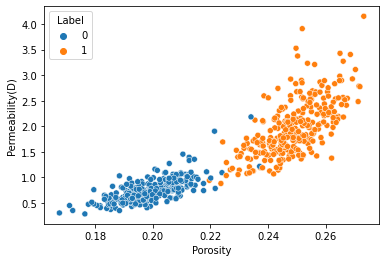

In [39]:
sns.scatterplot(df['Porosity'] , df['Permeability(D)'] , hue=df['Label'])

In [41]:
model.fit(Xt,yt)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
df

,Porosity,Permeability(D),Swc,Label,Lithology
0,0.261838,1.847371,0.113023,1,Sandstone
1,0.211287,1.061215,0.093022,0,Limestone
2,0.267418,2.547724,0.100812,1,Sandstone
3,0.189673,0.521953,0.104608,0,Limestone
4,0.251913,2.263732,0.093779,1,Sandstone
...,...,...,...,...,...
595,0.205622,0.907546,0.094752,0,Limestone
596,0.205706,0.984683,0.091047,0,Limestone
597,0.257950,2.668588,0.090992,1,Sandstone
598,0.243762,1.333738,0.113648,1,Sandstone


In [44]:
model.predict([[0.25,1.71,0.11]])

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1], dtype=int64)

In [45]:
yp = predict(X)

In [46]:
df['Pred'] = yp.reshape(600,1)

In [47]:
df

,Porosity,Permeability(D),Swc,Label,Lithology,Pred
0,0.261838,1.847371,0.113023,1,Sandstone,1.0
1,0.211287,1.061215,0.093022,0,Limestone,0.0
2,0.267418,2.547724,0.100812,1,Sandstone,1.0
3,0.189673,0.521953,0.104608,0,Limestone,0.0
4,0.251913,2.263732,0.093779,1,Sandstone,1.0
...,...,...,...,...,...,...
595,0.205622,0.907546,0.094752,0,Limestone,0.0
596,0.205706,0.984683,0.091047,0,Limestone,0.0
597,0.257950,2.668588,0.090992,1,Sandstone,1.0
598,0.243762,1.333738,0.113648,1,Sandstone,1.0


In [49]:
import matplotlib.pyplot as plt

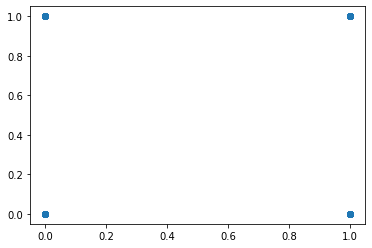

In [50]:
plt.scatter(df["Label"],df["Pred"])

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(df["Label"],df["Pred"]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       300
           1       0.97      0.95      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(df["Label"],df["Pred"]))

[[292   8]
 [ 14 286]]


In [56]:
#KNN Training
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1) #nearest neigbour = 1
knn.fit(Xt,yt)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [57]:
knn.score(Xt, yt)

1.0

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(Xt, yt)


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
Xt

,Porosity,Permeability(D),Swc
0,0.261838,1.847371,0.113023
1,0.211287,1.061215,0.093022
2,0.267418,2.547724,0.100812
3,0.189673,0.521953,0.104608
4,0.251913,2.263732,0.093779
...,...,...,...
595,0.205622,0.907546,0.094752
596,0.205706,0.984683,0.091047
597,0.257950,2.668588,0.090992
598,0.243762,1.333738,0.113648


In [72]:
df

,Porosity,Permeability(D),Swc,Label,Lithology,Pred
0,0.261838,1.847371,0.113023,1,Sandstone,1.0
1,0.211287,1.061215,0.093022,0,Limestone,0.0
2,0.267418,2.547724,0.100812,1,Sandstone,1.0
3,0.189673,0.521953,0.104608,0,Limestone,0.0
4,0.251913,2.263732,0.093779,1,Sandstone,1.0
...,...,...,...,...,...,...
595,0.205622,0.907546,0.094752,0,Limestone,0.0
596,0.205706,0.984683,0.091047,0,Limestone,0.0
597,0.257950,2.668588,0.090992,1,Sandstone,1.0
598,0.243762,1.333738,0.113648,1,Sandstone,1.0


In [73]:
from sklearn.tree import export_graphviz
export_graphviz(
                tree_clf,
                out_file="t.dot",
                feature_names=["Porosity","Permeability","Saturation"],
                class_names=["Limestone","Sandstone"],
                rounded=True,
                filled=True
                )


In [74]:
from sklearn import tree

[Text(120.31875000000001, 199.32, 'X[0] <= 0.223\ngini = 0.5\nsamples = 600\nvalue = [300, 300]'),
 Text(41.85, 163.07999999999998, 'X[0] <= 0.219\ngini = 0.007\nsamples = 298\nvalue = [297, 1]'),
 Text(20.925, 126.83999999999999, 'gini = 0.0\nsamples = 294\nvalue = [294, 0]'),
 Text(62.775000000000006, 126.83999999999999, 'X[0] <= 0.22\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(198.7875, 163.07999999999998, 'X[0] <= 0.224\ngini = 0.02\nsamples = 302\nvalue = [3, 299]'),
 Text(146.475, 126.83999999999999, 'X[2] <= 0.11\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(125.55000000000001, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 126.83999999999999, 'X[2] <= 0.081\ngini = 0.013\nsamples = 300\nvalue = [2, 298]'),
 Text(209.25, 90.6, 'X[1] <= 2.371\ngini = 0.19

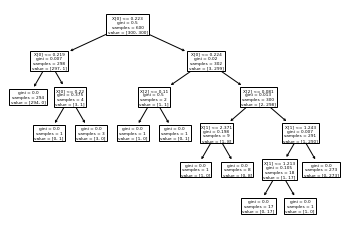

In [75]:
tree.plot_tree(tree_clf)